In [70]:
import pandas as pd
import numpy as np

In [71]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [73]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [74]:
customers_df.isnull().sum(), products_df.isnull().sum(), transactions_df.isnull().sum()

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

In [75]:
customers_df = customers_df.drop_duplicates()
transactions_df = transactions_df.drop_duplicates()

In [76]:
customers_df.columns = customers_df.columns.str.strip().str.lower()
customers_df.columns

Index(['customerid', 'customername', 'region', 'signupdate'], dtype='object')

In [77]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


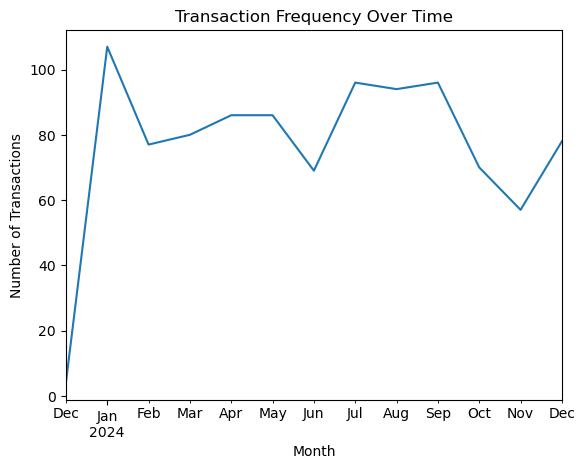

In [78]:
import matplotlib.pyplot as plt

transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M')).size().plot()

plt.title('Transaction Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


In [79]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerid    200 non-null    object
 1   customername  200 non-null    object
 2   region        200 non-null    object
 3   signupdate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


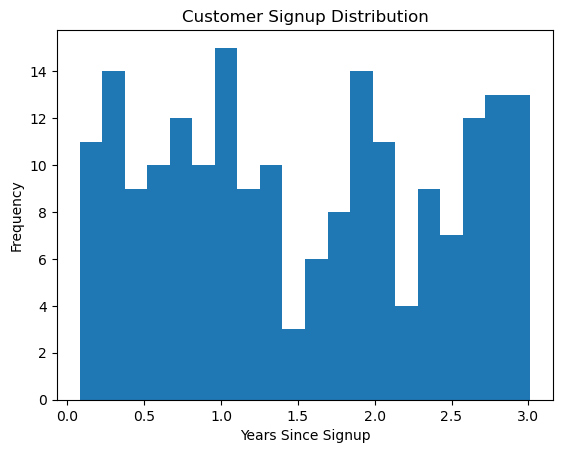

In [80]:
customers_df['signupdate'] = pd.to_datetime(customers_df['signupdate'])
customers_df['years_since_signup'] = (pd.to_datetime('today') - customers_df['signupdate']).dt.days / 365
customers_df['years_since_signup'].plot(kind='hist', bins=20, title='Customer Signup Distribution')
plt.xlabel('Years Since Signup')
plt.show()

In [81]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


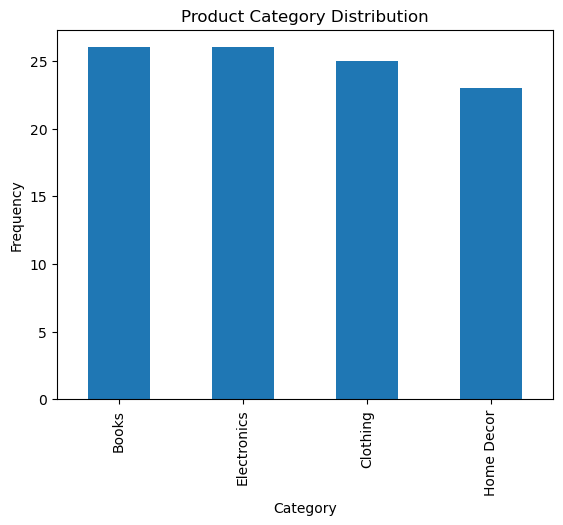

In [82]:
products_df['Category'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


Davies-Bouldin Index: 0.49227724367591147


C:\Users\Priyanka.M\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


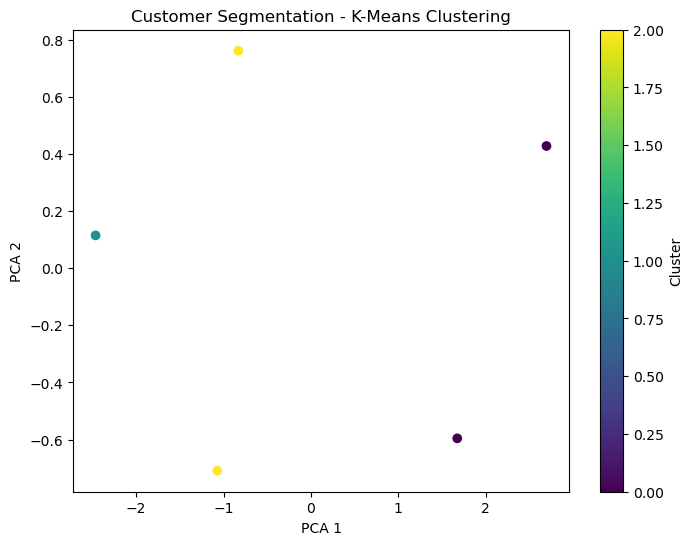

  CustomerID  Age  AnnualIncome  TransactionCount  AvgTransactionValue  \
0       C001   25         50000                 5                  150   
1       C002   34         70000                 8                  200   
2       C003   28         65000                 4                  120   
3       C004   40         80000                10                  180   
4       C005   23         45000                 3                  100   

   Cluster      PCA1      PCA2  
0        2 -1.072322 -0.709108  
1        0  1.673976 -0.595699  
2        2 -0.831557  0.761657  
3        0  2.695452  0.428080  
4        1 -2.465549  0.115071  


In [69]:
# Sample customer data (Replace with actual data)
customer_data = {
    'CustomerID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'Age': [25, 34, 28, 40, 23],
    'AnnualIncome': [50000, 70000, 65000, 80000, 45000],
    'TransactionCount': [5, 8, 4, 10, 3],
    'AvgTransactionValue': [150, 200, 120, 180, 100],
}

# Load customer data into a DataFrame
customers_df = pd.DataFrame(customer_data)

# Select features for clustering
features = customers_df[['Age', 'AnnualIncome', 'TransactionCount', 'AvgTransactionValue']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customers_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate Clustering using Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(scaled_features, customers_df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Reduce the dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a new DataFrame for visualization
customers_df['PCA1'] = pca_components[:, 0]
customers_df['PCA2'] = pca_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customers_df['PCA1'], customers_df['PCA2'], c=customers_df['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation - K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the segmented customer data
print(customers_df)

